<a href="https://colab.research.google.com/github/wjydaniel/Carrefour-products-recognition/blob/main/car_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading dataset**

take a quick look at the data structure

In [13]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("amjadzhour/car-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 19.4k/19.4k [00:00<00:00, 33.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/amjadzhour/car-price-prediction/versions/1


In [14]:
print(path)
os.listdir(path)

/root/.cache/kagglehub/datasets/amjadzhour/car-price-prediction/versions/1


['Car_Price_Prediction.csv']

In [15]:
import pandas as pd
car = pd.read_csv(path + '/Car_Price_Prediction.csv')

In [94]:
# not good to use 2 high corr to build a low corr feature
car['Use Intensity'] = car.Mileage / (2022 - car.Year)

In [27]:
# duplication
car.apply(lambda x: ''.join([str(e) for e in x]), axis=1).value_counts().max()

1

In [28]:
cat_features = ['Make', 'Model', 'Fuel Type', 'Transmission']
num_features = ['Year', 'Engine Size', 'Mileage']
target = 'Price'

In [29]:
car['Make'].value_counts()

,count
Make,
Ford,225
Audi,212
Honda,198
Toyota,187
BMW,178


In [30]:
car['Model'].value_counts()

,count
Model,
Model B,212
Model C,205
Model A,202
Model D,197
Model E,184


In [31]:
car['Fuel Type'].value_counts()

,count
Fuel Type,
Diesel,344
Petrol,331
Electric,325


In [95]:
car.describe()

,Year,Engine Size,Mileage,Price,Use Intensity
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530,16528.261561
std,6.288577,1.024137,59447.31576,5181.401368,25887.472146
min,2000.000000,1.000000,56.00000,6704.953524,9.333333
25%,2005.000000,1.900000,44768.75000,21587.878370,4221.747159
50%,2011.000000,2.800000,94411.50000,25189.325247,8609.253571
75%,2016.000000,3.700000,148977.75000,28806.368974,16176.937500
max,2021.000000,4.500000,199867.00000,41780.504635,193767.000000


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Engine Size'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Use Intensity'}>, <Axes: >]],
      dtype=object)

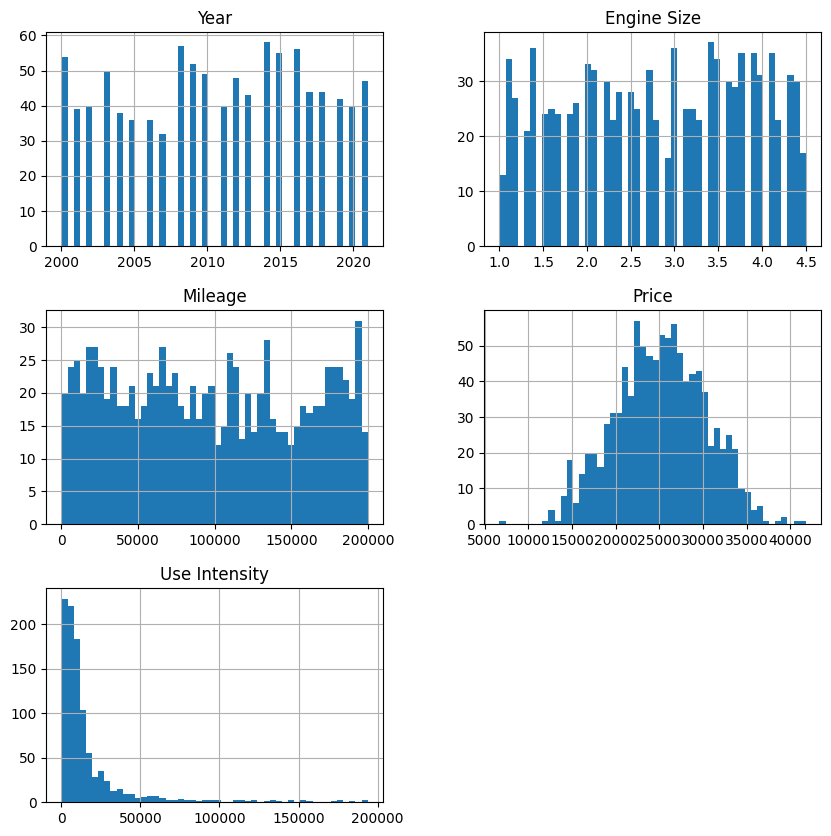

In [96]:
import matplotlib.pyplot as plt
car.hist(bins=50, figsize=(10,10))

0. No cleaning is needed as no NULL found

1. Encode the categorical features using One-Hot because they have no meaningful order

In [97]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_features_oh = ohe.fit_transform(car[cat_features])
cat_features_oh

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 15)>

In [98]:
cat_features_oh.toarray()

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [99]:
import numpy as np
np.concatenate(ohe.categories_).tolist()

['Audi',
 'BMW',
 'Ford',
 'Honda',
 'Toyota',
 'Model A',
 'Model B',
 'Model C',
 'Model D',
 'Model E',
 'Diesel',
 'Electric',
 'Petrol',
 'Automatic',
 'Manual']

In [104]:
car_oh = car[num_features].copy()
car_oh[np.concatenate(ohe.categories_).tolist()] = cat_features_oh.toarray()
car_oh[target] = car[target]

In [101]:
car_oh.head()

,Year,Engine Size,Mileage,Audi,BMW,Ford,Honda,Toyota,Model A,Model B,Model C,Model D,Model E,Diesel,Electric,Petrol,Automatic,Manual,Price
0,2015,3.9,74176,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,30246.207931
1,2014,1.7,94799,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,22785.747684
2,2006,4.1,98385,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25760.290347
3,2015,2.6,88919,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,25638.003491
4,2004,3.4,138482,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,21021.386657


In [103]:
car_oh.corr().loc['Price']

,Price
Year,0.609631
Engine Size,0.383951
Mileage,-0.556560
Audi,-0.047353
BMW,-0.006690
Ford,0.020064
Honda,0.054260
Toyota,-0.020740
Model A,-0.036314
Model B,0.005426


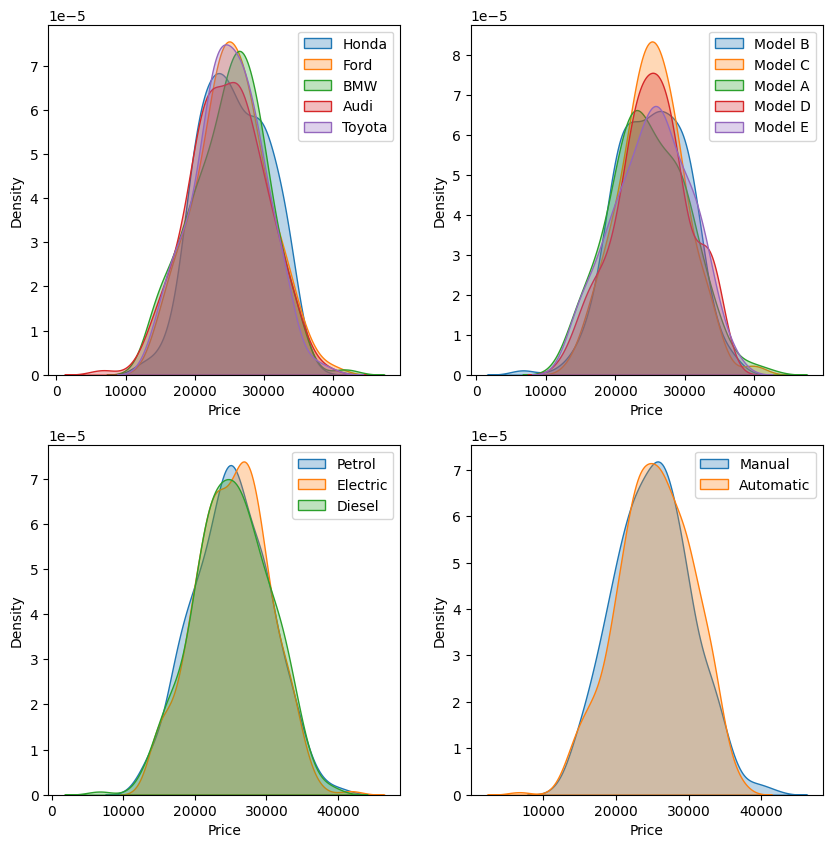

In [62]:
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(10,10))
keys = ['Make', 'Model', 'Fuel Type', 'Transmission']
for ax, key in zip(axes.flatten(), keys):
  for x in car[key].unique():
    sns.kdeplot(car_oh[car_oh[x]==1].Price, label=x, fill=True, alpha=0.3, ax=ax)
  ax.legend()
plt.show()

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_ppl = Pipeline([
    ('std_rescale', StandardScaler())
])

class CatFeaturesCombinedLabelAdder(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    labels = [''.join([str(int(x)) for x in row]) for row in X]
    return np.c_[X, labels]

cat_ppl = Pipeline([
    ('one_hot', OneHotEncoder(sparse_output=False)),
    ('add_label', CatFeaturesCombinedLabelAdder())
])

preprocess_ppl = ColumnTransformer([
    ('num', num_ppl, num_features),
    ('cat', cat_ppl, cat_features),
    ('target', 'passthrough', [target])
])

car_preprocessed = preprocess_ppl.fit_transform(car)

In [64]:
car_preprocessed = pd.DataFrame(car_preprocessed, columns = num_features + np.concatenate(ohe.categories_).tolist() + ['label', target])

2. split data and prepare for cross validation

In [65]:
label_val_count = car_preprocessed['label'].value_counts()
rare_labels = label_val_count[label_val_count < 5].index.to_list()
rare_samples_index = car_preprocessed[car_preprocessed.label.isin(rare_labels)].index
car_preprocessed.loc[rare_samples_index, 'label'] = 'rare'

In [72]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuf = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for _train, _test in strat_shuf.split(car_preprocessed, car_preprocessed['label']):
  car_train_index = _train
  car_test_index = _test

3. Train and evaluate models on the training set

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# -2 col is label, exclude from the features
training_explainers = car_preprocessed.loc[car_train_index].iloc[:, :-2]
training_target = car_preprocessed.loc[car_train_index].iloc[:, -1]
lr.fit(training_explainers, training_target)

LinearRegression()

In [74]:
from sklearn.metrics import r2_score

testing_explainers = car_preprocessed.loc[car_test_index].iloc[:, :-2]
testing_targets = car_preprocessed.loc[car_test_index].iloc[:, -1]
# insample results
insample_lr_prediction = lr.predict(training_explainers)
print(f'In sample R2 = {r2_score(training_target, insample_lr_prediction)}')

out_lr_prediction = lr.predict(testing_explainers)
print(f'Out sample R2 = {r2_score(testing_targets, out_lr_prediction)}')

In sample R2 = 0.8367870622525747
Out sample R2 = 0.8532679466463049


In [75]:
lr_num = LinearRegression()
# -2 col is label, exclude from the features
training_explainers_num = car_preprocessed.loc[car_train_index][num_features]
training_target_num = car_preprocessed.loc[car_train_index][target]
lr_num.fit(training_explainers_num, training_target_num)

LinearRegression()

In [76]:
testing_explainers_num = car_preprocessed.loc[car_test_index][num_features]
testing_targets_num = car_preprocessed.loc[car_test_index][target]
# insample results
insample_lr_prediction = lr_num.predict(training_explainers_num)
print(f'In sample R2 = {r2_score(training_target_num, insample_lr_prediction)}')

out_lr_prediction = lr_num.predict(testing_explainers_num)
print(f'Out sample R2 = {r2_score(testing_targets_num, out_lr_prediction)}')

In sample R2 = 0.8352353225986121
Out sample R2 = 0.8566228942334914


removing the categorical data from the linear regression model does not harm the out sample performance

In [77]:
from sklearn.tree import DecisionTreeRegressor

dtr_in_r2 = []
dtr_out_r2 = []
for max_dep in [1,2,3,4,5,6,7,8,9,10]:
  dtr = DecisionTreeRegressor(max_depth=max_dep)
  dtr.fit(training_explainers, training_target)

  insample_dtr_prediction = dtr.predict(training_explainers)
  # print(f'In sample R2 = {r2_score(training_target, insample_dtr_prediction)}')

  out_dtr_prediction = dtr.predict(testing_explainers)
  # print(f'Out sample R2 = {r2_score(testing_targets, out_dtr_prediction)}')

  dtr_in_r2.append(r2_score(training_target, insample_dtr_prediction))
  dtr_out_r2.append(r2_score(testing_targets, out_dtr_prediction))

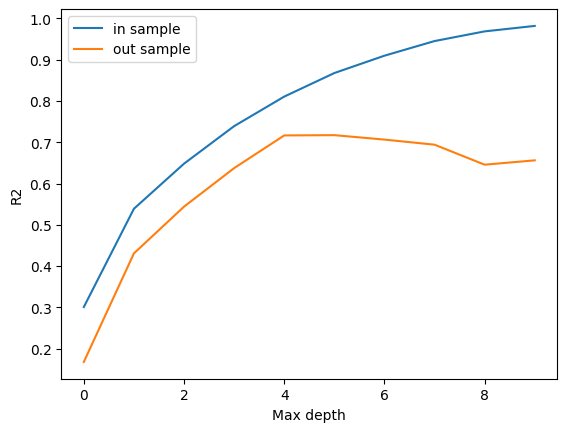

In [78]:
plt.plot(dtr_in_r2, label='in sample')
plt.plot(dtr_out_r2, label='out sample')
plt.xlabel('Max depth')
plt.ylabel('R2')
plt.legend()
plt.show()

In [79]:
from sklearn.model_selection import GridSearchCV

feature_grid = {
    'max_depth': [1,3,5,8,10, 15, 20],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [1, 5, 10]
}

grid_dtr = GridSearchCV(DecisionTreeRegressor(), feature_grid, cv=5, scoring='neg_mean_squared_error')
grid_dtr.fit(training_explainers, training_target)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 8, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [10, 20, 30]},
             scoring='neg_mean_squared_error')

In [80]:
grid_dtr.best_params_

{'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [81]:

insample_dtr_prediction = grid_dtr.best_estimator_.predict(training_explainers)
print(f'In sample R2 = {r2_score(training_target, insample_dtr_prediction)}')

out_dtr_prediction = grid_dtr.best_estimator_.predict(testing_explainers)
print(f'Out sample R2 = {r2_score(testing_targets, out_dtr_prediction)}')

In sample R2 = 0.851609642138548
Out sample R2 = 0.7639899511754156


In [82]:
from sklearn.ensemble import RandomForestRegressor

rtr_in_r2 = []
rtr_out_r2 = []
for n_trees in [2,5,10,20,30,50,100]:
  rfr = RandomForestRegressor(n_estimators=n_trees)
  rfr.fit(training_explainers, training_target)

  insample_dtr_prediction = rfr.predict(training_explainers)
  out_dtr_prediction = rfr.predict(testing_explainers)
  rtr_in_r2.append(r2_score(training_target, insample_dtr_prediction))
  rtr_out_r2.append(r2_score(testing_targets, out_dtr_prediction))

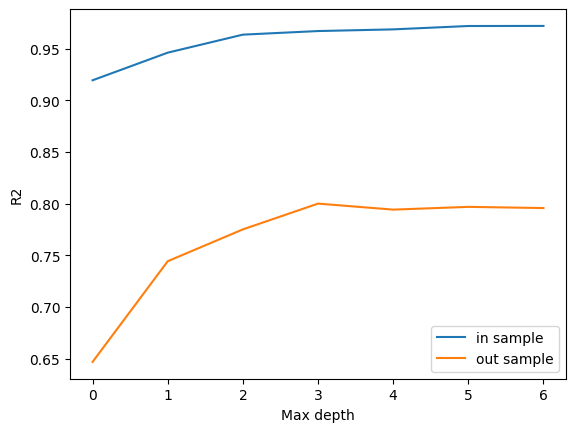

In [83]:
plt.plot(rtr_in_r2, label='in sample')
plt.plot(rtr_out_r2, label='out sample')
plt.xlabel('Max depth')
plt.ylabel('R2')
plt.legend()
plt.show()

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    'n_estimators': randint(low=20, high=200),
    'max_depth': randint(low=2, high=10),
    'min_samples_split': randint(low=1, high=5),
    'min_samples_leaf': randint(low=1, high=5)
}
random_rfr = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=5)
random_rfr.fit(training_explainers, training_target)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5416dd5110>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f541a9f0a50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f541a605f10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5414745350>})

In [85]:
random_rfr.best_params_

{'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 87}

In [86]:
insample_dtr_prediction = random_rfr.best_estimator_.predict(training_explainers)
print(f'In sample R2 = {r2_score(training_target, insample_dtr_prediction)}')

out_dtr_prediction = random_rfr.best_estimator_.predict(testing_explainers)
print(f'Out sample R2 = {r2_score(testing_targets, out_dtr_prediction)}')

In sample R2 = 0.8959099972899217
Out sample R2 = 0.8032637457137117
